In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

# Read Data

In [2]:
Credit = pd.read_csv('./Data/creditcard.csv')
Credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Summary statistics for transaction amount
Fraud_amt = Credit.Amount[Credit.Class == 1]
NF_amt = Credit.Amount[Credit.Class == 0]

print ("Fraud")
print (Fraud_amt.describe())
print ()
print ("Non-fraud")
print (NF_amt.describe())

Fraud
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Non-fraud
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


In [4]:
# Function for summary statistics and t-test

def T_test(Var):
    for i in Var:
        print('Variable:', i)
        
        Fraud = Credit[i][Credit.Class == 1]
        Non_fraud = Credit[i][Credit.Class == 0] 
        
        # Summary statistics for the variable
        print("Fraud")
        print(Fraud.describe(), '\n')
        print("Non-fraud")
        print(Non_fraud.describe(), '\n')
        
        # t-test
        print(stats.ttest_ind(Fraud, Non_fraud, equal_var = False), '\n')

In [5]:
Var_list=['Amount', 'V1']
T_test(Var_list)

Variable: Amount
Fraud
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64 

Non-fraud
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64 

Ttest_indResult(statistic=2.9287895308564669, pvalue=0.003560518851710299) 

Variable: V1
Fraud
count    492.000000
mean      -4.771948
std        6.783687
min      -30.552380
25%       -6.036063
50%       -2.342497
75%       -0.419200
max        2.132386
Name: V1, dtype: float64 

Non-fraud
count    284315.000000
mean          0.008258
std           1.929814
min         -56.407510
25%          -0.917544
50%           0.020023
75%           1.316218
max           2.454930
Name: V1, dtype: float64 

Ttest_indResult(statistic=-15.629064609674844, pv

In [6]:
Correlation_matrix = Credit.corr().round(2)

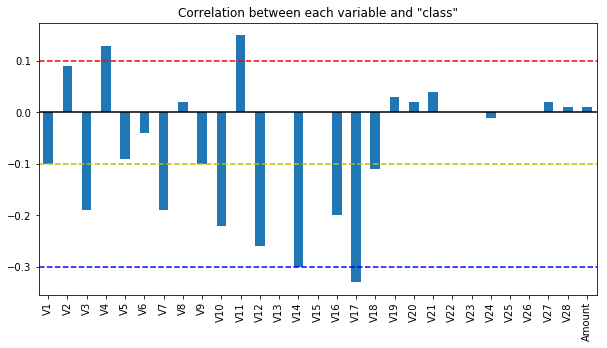

In [7]:
plt.figure(figsize=(10,5))
Correlation_matrix['Class'][1:30].plot(kind='bar')

plt.axhline(y=0.1, color='r', linestyle='--')
plt.axhline(y=0, color='black', linestyle='-')
plt.axhline(y=-0.1, color='y', linestyle='--')
plt.axhline(y=-0.3, color='b', linestyle='--')

plt.title('Correlation between each variable and "class"')
plt.show()